IMPORT wala Part

In [4]:
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os

In [5]:
import random

In [6]:
TRAIN_DIR = 'C:/Users/Suraj Tiwari/Desktop/Drowsy set/train_set/'
TEST_DIR = 'C:/Users/Suraj Tiwari/Desktop/Drowsy set/test_set/'
IMG_SIZE = 100
LR = 1e-3
print(TRAIN_DIR)
print(TEST_DIR)

C:/Users/Suraj Tiwari/Desktop/Drowsy set/train_set/
C:/Users/Suraj Tiwari/Desktop/Drowsy set/test_set/


FUNCTIONS

In [7]:
#resize the image to 100 X 100
def resizeImg(im):
        if(im.shape[0]>100):
            im=im[0:100,:]
        if(im.shape[1]>100):
            im=im[:,0:100]
        newPadded = np.zeros((100,100))
        if(im.shape[0]<100):
             for i in range(im.shape[1]):
                for j in range(im.shape[0]):
                    newPadded[(j,i)]=im[(j,i)]
        if(im.shape[1]<100):
            for i in range(im.shape[0]):
                for j in range(im.shape[1]):
                    newPadded[(i,j)]=im[(i,j)]
        if(im.shape[0]==100 and im.shape[1]==100):
                for i in range(im.shape[0]):
                    for j in range(im.shape[1]):
                        newPadded[(i,j)]=im[(i,j)]
        return newPadded

In [8]:
MODEL_NAME = 'drowsinessdetection-{}-{}.model'.format(LR, '6conv-basic') 

def label_img(img): 
    word_label = img.split('.')
    word_label = word_label[0][-1:]
    if word_label == 'd': return [1, 0] 
    elif word_label == 'n': return [0, 1]

In [9]:
#Training set Generation Function
    def TrainSetGenerate(TRAIN_DIR):
        x=os.listdir(TRAIN_DIR)
        im=[]
        imgLabel={}
        for i in range(50):
            Addr = TRAIN_DIR+x[i]
            img = cv2.imread(Addr)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = resizeImg(img)
            imgLabel[i] = label_img(Addr)
            im.append([np.array(img),np.array(imgLabel[i])])
        np.save('train_data.npy', im) 

        return im;
    

In [10]:
#Testing set generation Function
    def TestSetGenerate(TEST_DIR):
        x=os.listdir(TEST_DIR)
        im=[]
        imgLabel={}
        for i in range(10):
            Addr = TEST_DIR+x[i]
            img = cv2.imread(Addr)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = resizeImg(img)
            imgLabel[i] = label_img(Addr)
            im.append([np.array(img),np.array(imgLabel[i])])
        np.save('test_data.npy', im) 
        return im;

Model 

In [11]:
'''Creating the neural network using tensorflow'''
# Importing the required libraries 
import tflearn 
from tflearn.layers.conv import conv_2d, max_pool_2d 
from tflearn.layers.core import input_data, dropout, fully_connected 
from tflearn.layers.estimator import regression 

import tensorflow as tf 
tf.reset_default_graph() 
convnet = input_data(shape =[None, IMG_SIZE, IMG_SIZE, 1], name ='input') 

convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 

convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 

convnet = conv_2d(convnet, 128, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 

convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 

convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 

convnet = fully_connected(convnet, 1024, activation ='relu') 
convnet = dropout(convnet, 0.8) 

convnet = fully_connected(convnet, 2, activation ='softmax') 
convnet = regression(convnet, optimizer ='adam', learning_rate = LR, loss ='categorical_crossentropy', name ='targets') 

model = tflearn.DNN(convnet, tensorboard_dir ='log') 

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [12]:
train = TrainSetGenerate(TRAIN_DIR)
test = TestSetGenerate(TEST_DIR)
random.shuffle(train)
print(len(train))
print(len(test))

50
10


In [13]:
# X-Features & Y-Labels 

X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
Y = [i[1] for i in train] 
test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
test_y = [i[1] for i in test] 

In [14]:
model.fit({'input': X}, {'targets': Y}, n_epoch = 100, 
          validation_set =({'input': test_x}, {'targets': test_y}), 
          snapshot_step = 500, show_metric = True, run_id = MODEL_NAME) 
model.save(MODEL_NAME) 

---------------------------------
Run id: drowsinessdetection-0.001-6conv-basic.model
Log directory: log/
INFO:tensorflow:Summary name Accuracy/ (raw) is illegal; using Accuracy/__raw_ instead.
---------------------------------
Training samples: 50
Validation samples: 10
--
Training Step: 1  | time: 5.626s
| Adam | epoch: 001 | loss: 0.00000 - acc: 0.0000 | val_loss: 0.81487 - val_acc: 0.5000 -- iter: 50/50
--
Training Step: 2  | total loss: 0.63398 | time: 4.031s
| Adam | epoch: 002 | loss: 0.63398 - acc: 0.3780 | val_loss: 0.70027 - val_acc: 0.5000 -- iter: 50/50
--
Training Step: 3  | total loss: 0.66711 | time: 3.284s
| Adam | epoch: 003 | loss: 0.66711 - acc: 0.5924 | val_loss: 0.70200 - val_acc: 0.5000 -- iter: 50/50
--
Training Step: 4  | total loss: 0.66692 | time: 3.294s
| Adam | epoch: 004 | loss: 0.66692 - acc: 0.6281 | val_loss: 0.72173 - val_acc: 0.5000 -- iter: 50/50
--
Training Step: 5  | total loss: 0.66516 | time: 3.188s
| Adam | epoch: 005 | loss: 0.66516 - acc: 0.636

Training Step: 46  | total loss: 0.64081 | time: 3.256s
| Adam | epoch: 046 | loss: 0.64081 - acc: 0.6390 | val_loss: 0.63685 - val_acc: 0.5000 -- iter: 50/50
--
Training Step: 47  | total loss: 0.63386 | time: 3.261s
| Adam | epoch: 047 | loss: 0.63386 - acc: 0.6392 | val_loss: 0.64078 - val_acc: 0.6000 -- iter: 50/50
--
Training Step: 48  | total loss: 0.63564 | time: 3.333s
| Adam | epoch: 048 | loss: 0.63564 - acc: 0.6425 | val_loss: 0.62002 - val_acc: 0.6000 -- iter: 50/50
--
Training Step: 49  | total loss: 0.62996 | time: 3.303s
| Adam | epoch: 049 | loss: 0.62996 - acc: 0.6453 | val_loss: 0.60776 - val_acc: 0.7000 -- iter: 50/50
--
Training Step: 50  | total loss: 0.63842 | time: 3.589s
| Adam | epoch: 050 | loss: 0.63842 - acc: 0.6476 | val_loss: 0.58616 - val_acc: 0.8000 -- iter: 50/50
--
Training Step: 51  | total loss: 0.63004 | time: 3.180s
| Adam | epoch: 051 | loss: 0.63004 - acc: 0.6586 | val_loss: 0.58446 - val_acc: 0.7000 -- iter: 50/50
--
Training Step: 52  | total l

Training Step: 92  | total loss: 0.60706 | time: 3.271s
| Adam | epoch: 092 | loss: 0.60706 - acc: 0.7222 | val_loss: 0.51954 - val_acc: 0.8000 -- iter: 50/50
--
Training Step: 93  | total loss: 0.59708 | time: 3.332s
| Adam | epoch: 093 | loss: 0.59708 - acc: 0.7240 | val_loss: 0.53116 - val_acc: 0.7000 -- iter: 50/50
--
Training Step: 94  | total loss: 0.60444 | time: 3.243s
| Adam | epoch: 094 | loss: 0.60444 - acc: 0.7136 | val_loss: 0.50825 - val_acc: 0.9000 -- iter: 50/50
--
Training Step: 95  | total loss: 0.59485 | time: 3.413s
| Adam | epoch: 095 | loss: 0.59485 - acc: 0.7142 | val_loss: 0.48485 - val_acc: 0.9000 -- iter: 50/50
--
Training Step: 96  | total loss: 0.58460 | time: 3.367s
| Adam | epoch: 096 | loss: 0.58460 - acc: 0.7248 | val_loss: 0.46337 - val_acc: 0.9000 -- iter: 50/50
--
Training Step: 97  | total loss: 0.57259 | time: 3.242s
| Adam | epoch: 097 | loss: 0.57259 - acc: 0.7383 | val_loss: 0.45856 - val_acc: 0.9000 -- iter: 50/50
--
Training Step: 98  | total l

In [15]:
import cv2, time
video= cv2.VideoCapture(0)
a=0
while a<10:
    a +=1
    check, frame = video.read()
    print(check)
    print(frame)
    gray= cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cv2.imshow('Capturing',gray)
    key=cv2.waitKey(1)
    img_ = cv2.resize(gray,(100,100))
    cv2.imwrite("n.{}.jpg".format(a),img=img_)
    if key== ord('q'):
        break
    time.sleep(2)
print(a)
video.release()
cv2.destroyAllWindows()

True
[[[122 109 107]
  [123 110 108]
  [122 107 119]
  ...
  [150 141 136]
  [151 137 139]
  [154 140 142]]

 [[121 111 108]
  [121 111 108]
  [120 110 115]
  ...
  [153 142 142]
  [154 140 142]
  [154 140 142]]

 [[118 112 109]
  [118 112 109]
  [118 114 114]
  ...
  [154 143 145]
  [155 140 146]
  [156 141 147]]

 ...

 [[ 97  93  92]
  [ 97  93  92]
  [ 97  90  91]
  ...
  [139  99  56]
  [118  70  60]
  [ 87  39  29]]

 [[ 96  94  94]
  [ 95  93  93]
  [ 95  91  91]
  ...
  [144 101  49]
  [129  80  66]
  [ 94  45  31]]

 [[ 96  94  95]
  [ 95  93  94]
  [ 95  91  92]
  ...
  [146 100  42]
  [142  91  63]
  [111  60  32]]]
True
[[[114 107 116]
  [115 108 117]
  [124 108 116]
  ...
  [147 139 150]
  [144 142 142]
  [144 142 142]]

 [[112 106 117]
  [113 107 118]
  [118 109 116]
  ...
  [149 139 149]
  [147 143 143]
  [148 144 144]]

 [[112 108 114]
  [112 108 114]
  [115 109 115]
  ...
  [153 141 151]
  [151 144 146]
  [153 146 148]]

 ...

 [[101  92  94]
  [102  93  95]
  [107  91

In [16]:
TEST5_DIR = 'C:/Users/Suraj Tiwari/Desktop/190_Warriors/TESTSET/'
test = TestSetGenerate(TEST5_DIR)

[0.61443204 0.385568  ]


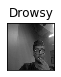

[0.5047095 0.4952905]


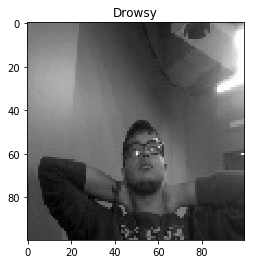

[0.60024893 0.39975107]


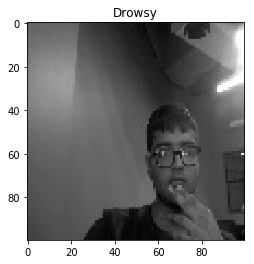

[0.6337887  0.36621127]


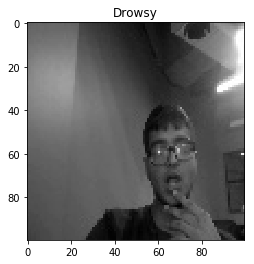

[0.64409727 0.35590276]


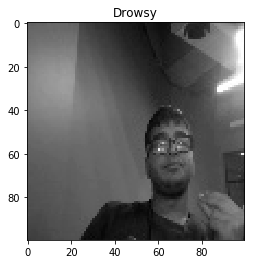

[0.5602724  0.43972757]


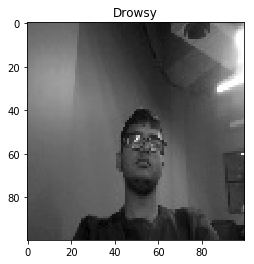

[0.43147078 0.5685292 ]


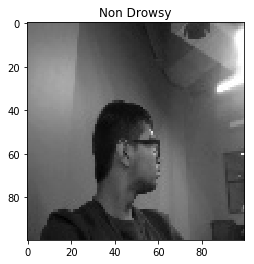

[0.48601702 0.51398295]


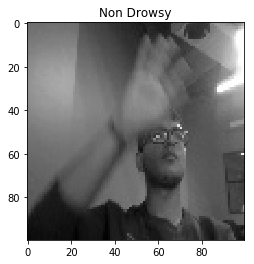

[0.4691144  0.53088564]


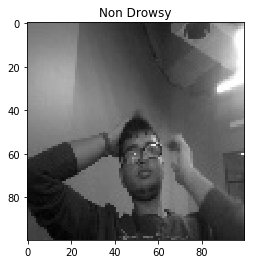

[0.4245768 0.5754232]


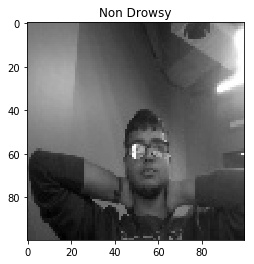

In [17]:
fig = plt.figure() 

for num, data in enumerate(test[:10]): 
    img_num = data[1]
    img_data = data[0]
    y = fig.add_subplot(4, 5, num + 1) 
    orig = img_data 
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1) 
    model_out = model.predict([data])[0]
    print(model_out)
    if np.argmax(model_out) == 1: str_label ='Non Drowsy'
    else: str_label ='Drowsy'
    plt.imshow(orig, cmap ='gray')  
    plt.title(str_label) 
    y.axes.get_xaxis().set_visible(False) 
    y.axes.get_yaxis().set_visible(False) 
    plt.show() 
